In [7]:
# 导包
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage import filters
%matplotlib inline

plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 设置正常显示负号

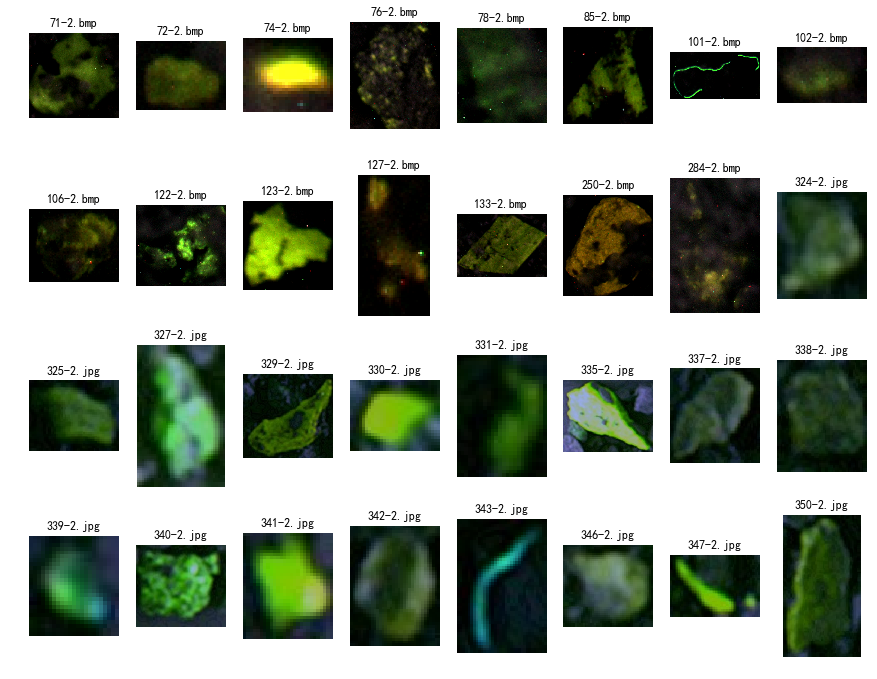

In [10]:
crop_root = 'train_2crop_temp'
fs = os.listdir(crop_root)
fs = [i for i in fs if i.count('-')==1]
fs = sorted(fs,key = lambda i: int(i.split('-')[0]))
plt.figure(figsize = (15,3*4))
for i in range(len(fs)):# img_name in fs:
    plt.subplot(4,8,i+1)
    plt.imshow(plt.imread(os.path.join(crop_root,fs[i])))
    plt.axis('off')
    plt.title(fs[i])
plt.savefig('select_color.png',dpi =300)

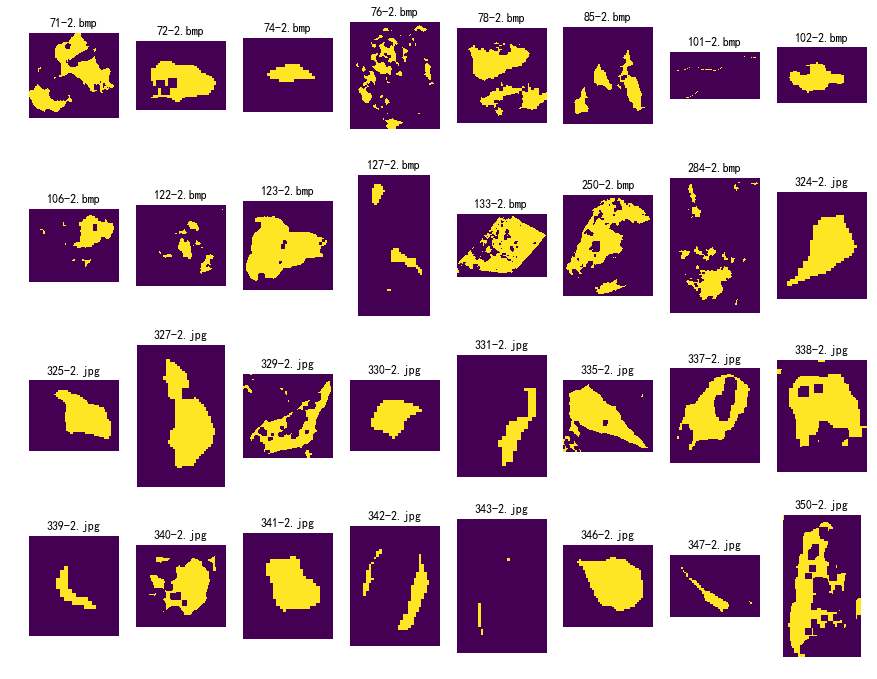

In [11]:
from skimage import filters
from matplotlib import pyplot as plt 

crop_root = 'train_2crop_temp'
fs = os.listdir(crop_root)
fs = [i for i in fs if i.count('-')==1]
fs = sorted(fs,key = lambda i: int(i.split('-')[0]))
plt.figure(figsize = (15,3*4))
for i in range(len(fs)):# img_name in fs:
    plt.subplot(4,8,i+1)
    img = plt.imread(os.path.join(crop_root,fs[i]))
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    thresh = filters.threshold_otsu(gray) 
    mask = (gray>=thresh)*1
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    mask = cv2.erode(mask.astype(np.float), kernel)   # 开运算
    plt.imshow(mask)
    plt.axis('off')
    plt.title(fs[i])
plt.savefig('select_color_otsu_erode.png',dpi =300)

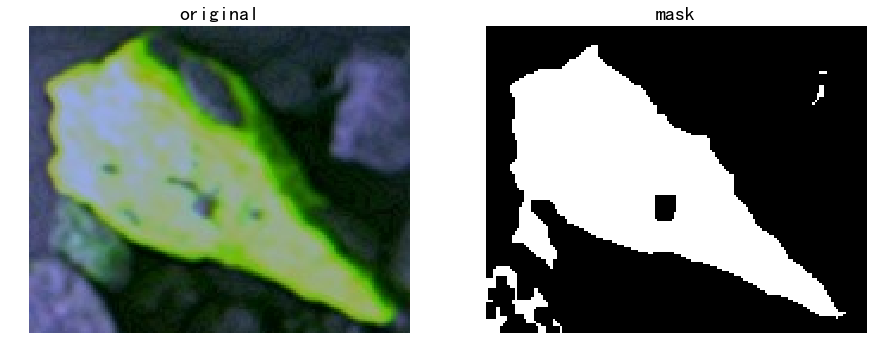

In [42]:
img_335 = plt.imread('train_2crop_temp/335-2.jpg')
gray = cv2.cvtColor(img_335,cv2.COLOR_RGB2GRAY)
thresh = filters.threshold_otsu(gray) 
mask = (gray>=thresh)*1
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
mask = cv2.erode(mask.astype(np.float), kernel)   # 开运算
plt.figure(figsize = (15,8))
plt.subplot(121)
plt.imshow(img_335)
plt.title('original',fontsize = 20)
plt.axis('off')
plt.subplot(122)
plt.imshow(mask,plt.cm.gray)
plt.title('mask',fontsize = 20)
plt.axis('off')
plt.savefig('badcase_select_color.png',dpi = 100)
plt.show()

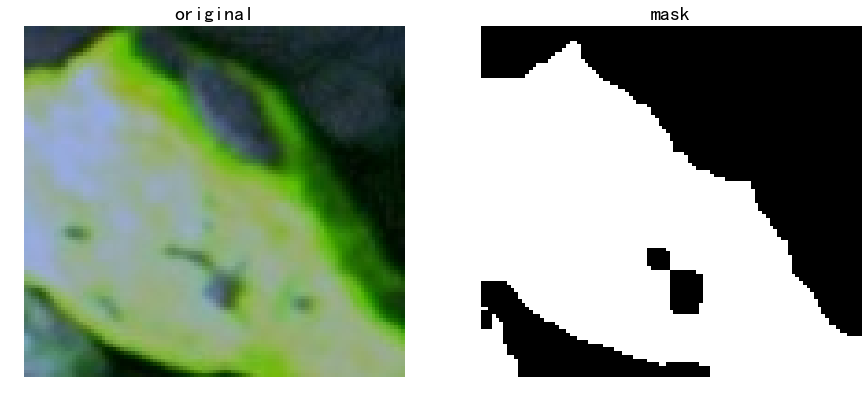

In [3]:
img_335 = plt.imread('train_2crop/335-2.jpg')
gray = cv2.cvtColor(img_335,cv2.COLOR_RGB2GRAY)
thresh = filters.threshold_otsu(gray) 
mask = (gray>=thresh)*1
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
mask = cv2.erode(mask.astype(np.float), kernel)   # 开运算
plt.figure(figsize = (15,8))
plt.subplot(121)
plt.imshow(img_335)
plt.title('original',fontsize = 20)
plt.axis('off')
plt.subplot(122)
plt.imshow(mask,plt.cm.gray)
plt.title('mask',fontsize = 20)
plt.axis('off')
plt.savefig('badcase_select_color_new.png',dpi = 100)
plt.show()

In [2]:
import cv2
import os
import numpy as np
from skimage import data,filters
import matplotlib.pyplot as plt
from PIL import Image 
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 设置正常显示负号

def seg_mode(img=None, img_name=None):
    if img is not None:# 待设计识别模式
        pass
    elif img_name is not None:
        if img_name.split('.')[-1] == 'jpg':
            return 'center'
        else:
            return 'all'
        
# https://blog.csdn.net/weixin_42009479/article/details/105812705
import cv2
import numpy as np
from scipy.signal import lfilter

N = 5000
b = 0.5

def max_min_value_filter(image, ksize=3, mode=1):# 最小值滤波的卷积核
    img = image.copy()
    rows, cols = img.shape
    # if channels == 3:
    #     img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    padding = (ksize-1) // 2
    new_img = cv2.copyMakeBorder(img, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=1)
    for i in range(rows):
        for j in range(cols):
            roi_img = new_img[i:i+ksize, j:j+ksize].copy()
            min_val, max_val, min_index, max_index = cv2.minMaxLoc(roi_img)
            if mode == 1:
                img[i, j] = max_val
            elif mode == 2:
                img[i, j] = min_val
            else:
                raise Exception("please Select a Mode: max(1) or min(2)")

    return img


def movingthreshold(f, n, k):
    shape = f.shape
    assert n >= 1
    assert 0 < k < 1
    f[1:-1:2, :] = np.fliplr(f[1:-1:2, :])
    f = f.flatten()
    maf = np.ones(n) / n
    res_filter = lfilter(maf, 1, f)
    g = np.array(f > k * res_filter).astype(int)
    g = g.reshape(shape)
    g[1:-1:2, :] = np.fliplr(g[1:-1:2, :])
    return g

def iter_gauss(img,ksize=55,sigma=35,g_t = 0.3,iter_num = 5):
    for i in range(iter_num):
        img = cv2.GaussianBlur(img,(ksize,ksize),sigma)
        img[img>g_t]=1
    img[img<=g_t] = 0
    return img

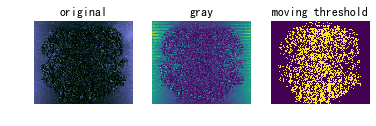

In [22]:
img_path = 'train_2/349-2.jpg'

img = plt.imread(img_path)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gray_mt = 1-movingthreshold(gray,1*gray.shape[1],0.4)
plt.subplot(131)
plt.imshow(img)
plt.title('original')
plt.axis('off')
plt.subplot(132)
plt.imshow(gray)
plt.title('gray')
plt.axis('off')
plt.subplot(133)
plt.imshow(gray_mt)
plt.title('moving threshold')
plt.axis('off')
plt.savefig('../latex/fig/移动平均阈值分割.png',dpi = 300)
plt.show()

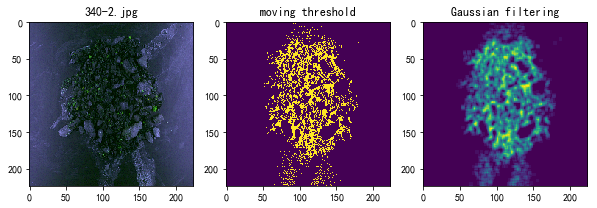

In [21]:
img_path = 'train_2/340-2.jpg'

img_orig = plt.imread(img_path)
img = Image.open(img_path).resize((224,224))
img = np.array(img)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gray_mt = 1-movingthreshold(gray,1*gray.shape[1],0.4)
gray_gauss = cv2.GaussianBlur(gray_mt.astype(np.float),(5,5),5)

plt.figure(figsize = (10,4))
plt.subplot(131)
plt.imshow(img)
plt.title(os.path.split(img_path)[-1])
# plt.axis('off')
plt.subplot(132)
plt.imshow(gray_mt)
plt.title('moving threshold')
# plt.axis('off')
plt.subplot(133)
plt.imshow(gray_gauss)
plt.title('Gaussian filtering')

plt.savefig('../latex/fig/移动平均后高斯滤波.png',dpi = 300)
plt.show()

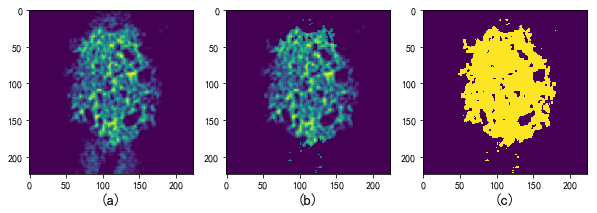

In [25]:
img_path = 'train_2/340-2.jpg'

img_orig = plt.imread(img_path)
img = Image.open(img_path).resize((224,224))
img = np.array(img)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gray_mt = 1-movingthreshold(gray,1*gray.shape[1],0.4)
gray_mt = cv2.GaussianBlur(gray_mt.astype(np.float),(5,5),5)
gray_gauss = gray_mt.copy()
gray_mt[:50,60:170][gray_mt[:50,60:170]<gray_mt[gray_mt>0].mean()] = 0
gray_mt[175:,60:170][gray_mt[175:,60:170]<gray_mt[gray_mt>0].mean()] = 0
gray_gauss_dis = gray_mt.copy()
gray_mt = (gray_mt>0.4*gray_mt.mean())*1 
plt.figure(figsize = (10,4))
plt.subplot(131)
plt.imshow(gray_gauss)
plt.xlabel('(a)',fontsize = 15)
# plt.axis('off')
plt.subplot(132)
plt.imshow(gray_gauss_dis)
plt.xlabel('(b)',fontsize = 15)
# plt.axis('off')
plt.subplot(133)
plt.imshow(gray_mt)
plt.xlabel('(c)',fontsize = 15)
# plt.axis('off')

plt.savefig('../latex/fig/高斯滤波后手动过滤.png',dpi = 300)
plt.show()

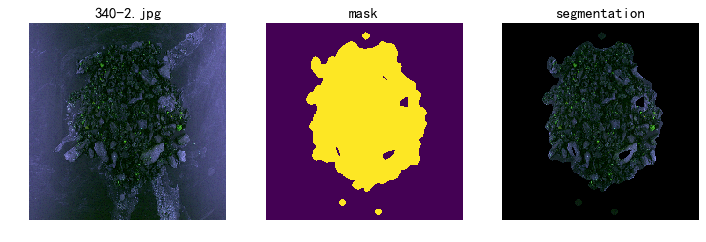

In [62]:
img_path = 'train_2/340-2.jpg'

img_orig = plt.imread(img_path)
img = Image.open(img_path).resize((224,224))
img = np.array(img)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gray_mt = 1-movingthreshold(gray,1*gray.shape[1],0.4)
gray_mt = cv2.GaussianBlur(gray_mt.astype(np.float),(5,5),5)
gray_gauss = gray_mt.copy()
gray_mt[:50,60:170][gray_mt[:50,60:170]<gray_mt[gray_mt>0].mean()] = 0
gray_mt[175:,60:170][gray_mt[175:,60:170]<gray_mt[gray_mt>0].mean()] = 0
gray_gauss_dis = gray_mt.copy()
gray_mt = (gray_mt>0.4*gray_mt.mean())*1 

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))  
morph_img =cv2.morphologyEx(gray_mt.astype(np.float)
                            ,cv2.MORPH_CLOSE,kernel) 

# 形态学开运算
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))  
morph_img =cv2.morphologyEx(morph_img.astype(np.float)
                            ,cv2.MORPH_OPEN,kernel) 
mask = morph_img
# 迭代高斯滤波
g_t = 0.3
for i in range(5):
    mask = cv2.GaussianBlur(mask,(3,3),1)
    if i == 5:
        mask_before_last = mask.copy()
    mask[mask>g_t]=1
    
mask[mask<=g_t] = 0

img_mask = img.copy()
for i in range(3):
    img_mask[...,i] = img_mask[...,i]*mask

plt.figure(figsize = (12,4))
plt.subplot(131)
plt.imshow(img)
plt.axis('off')
# plt.xlabel('(a)',fontsize = 15)
plt.title(os.path.split(img_path)[-1],fontsize = 15)
plt.subplot(132)
plt.imshow(mask)
plt.axis('off')
# plt.xlabel('(b)',fontsize = 15)
plt.title('mask',fontsize =15)
plt.subplot(133)
plt.imshow(img_mask)
plt.axis('off')
# plt.xlabel('(c)',fontsize = 15)
plt.title('segmentation',fontsize = 15)
# plt.suptitle(os.path.split(img_path)[-1],fontsize = 15)

plt.savefig('../latex/fig/岩石分割结果340.png',dpi = 300)
plt.show()

In [63]:
def iter_gauss(img,ksize=55,sigma=35,g_t = 0.3,iter_num = 5):
    for i in range(iter_num):
        img = cv2.GaussianBlur(img,(ksize,ksize),sigma)
        img[img>g_t]=1
    img[img<=g_t] = 0
    return img

def seg_stone(gray):
    # 移动平均阈值

    gray_mt = 1-movingthreshold(gray,1*gray.shape[1],0.4)
    gray_mt = cv2.GaussianBlur(gray_mt.astype(np.float),(5,5),5)
    gray_mt_before = gray_mt.copy()
    gray_mt[:50,60:170][gray_mt[:50,60:170]<gray_mt[gray_mt>0].mean()] = 0
    gray_mt[175:,60:170][gray_mt[175:,60:170]<gray_mt[gray_mt>0].mean()] = 0
    gray_mt = (gray_mt>0.4*gray_mt.mean())*1    
    # 最大滤波
#     g_max = max_min_value_filter(gray_mt,3,1)
#     g_max = cv2.blur(g_max,(3,3))

    # 形态学闭运算
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))  
    morph_img =cv2.morphologyEx(gray_mt.astype(np.float)
                                ,cv2.MORPH_CLOSE,kernel) 

    # 形态学开运算
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))  
    morph_img =cv2.morphologyEx(morph_img.astype(np.float)
                                ,cv2.MORPH_OPEN,kernel) 
    mask = morph_img
    # 迭代高斯滤波
    mask = iter_gauss(morph_img,ksize = 3,sigma = 1)
    return mask#, gray_mt, gray_mt_before,g_max

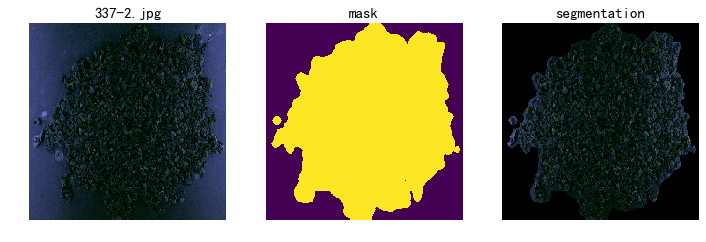

In [67]:
img_path = 'train_2/337-2.jpg'

img = Image.open(img_path).resize((224,224))
img = np.array(img)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

mask = seg_stone(gray)

img_mask = img.copy()
for i in range(3):
    img_mask[...,i] = img_mask[...,i]*mask
    
plt.figure(figsize = (12,4))
plt.subplot(131)
plt.imshow(img)
plt.axis('off')
# plt.xlabel('(a)',fontsize = 15)
plt.title(os.path.split(img_path)[-1],fontsize = 15)
plt.subplot(132)
plt.imshow(mask)
plt.axis('off')
# plt.xlabel('(b)',fontsize = 15)
plt.title('mask',fontsize =15)
plt.subplot(133)
plt.imshow(img_mask)
plt.axis('off')
# plt.xlabel('(c)',fontsize = 15)
plt.title('segmentation',fontsize = 15)
# plt.suptitle(os.path.split(img_path)[-1],fontsize = 15)

plt.savefig('../latex/fig/岩石分割结果337.png',dpi = 300)
plt.show()

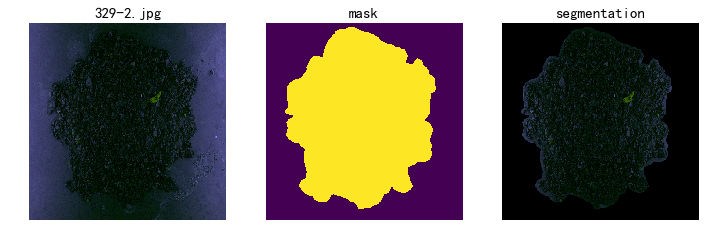

In [68]:
img_path = 'train_2/329-2.jpg'

img = Image.open(img_path).resize((224,224))
img = np.array(img)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

mask = seg_stone(gray)

img_mask = img.copy()
for i in range(3):
    img_mask[...,i] = img_mask[...,i]*mask
    
plt.figure(figsize = (12,4))
plt.subplot(131)
plt.imshow(img)
plt.axis('off')
# plt.xlabel('(a)',fontsize = 15)
plt.title(os.path.split(img_path)[-1],fontsize = 15)
plt.subplot(132)
plt.imshow(mask)
plt.axis('off')
# plt.xlabel('(b)',fontsize = 15)
plt.title('mask',fontsize =15)
plt.subplot(133)
plt.imshow(img_mask)
plt.axis('off')
# plt.xlabel('(c)',fontsize = 15)
plt.title('segmentation',fontsize = 15)
# plt.suptitle(os.path.split(img_path)[-1],fontsize = 15)

plt.savefig('../latex/fig/岩石分割结果329.png',dpi = 300)
plt.show()

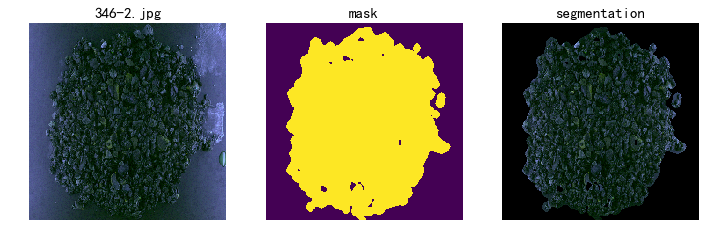

In [69]:
img_path = 'train_2/346-2.jpg'

img = Image.open(img_path).resize((224,224))
img = np.array(img)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

mask = seg_stone(gray)

img_mask = img.copy()
for i in range(3):
    img_mask[...,i] = img_mask[...,i]*mask
    
plt.figure(figsize = (12,4))
plt.subplot(131)
plt.imshow(img)
plt.axis('off')
# plt.xlabel('(a)',fontsize = 15)
plt.title(os.path.split(img_path)[-1],fontsize = 15)
plt.subplot(132)
plt.imshow(mask)
plt.axis('off')
# plt.xlabel('(b)',fontsize = 15)
plt.title('mask',fontsize =15)
plt.subplot(133)
plt.imshow(img_mask)
plt.axis('off')
# plt.xlabel('(c)',fontsize = 15)
plt.title('segmentation',fontsize = 15)
# plt.suptitle(os.path.split(img_path)[-1],fontsize = 15)

plt.savefig('../latex/fig/岩石分割结果346.png',dpi = 300)
plt.show()